In [8]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f (x,y):
    part1 = ((4 -(2.1*(x**2))) + ((1/3.0)*(x**4)))*(x**2)
    part2 = (x*y) - (4*(1 - y**2))*(y**2)
    return part1 + part2
X=[]
Y=[]
Z=[]
for x in np.linspace(-2,2,100):
    for y in np.linspace(-1,1,100):
        X.append(x)
        Y.append(y)
        Z.append(f(x,y))

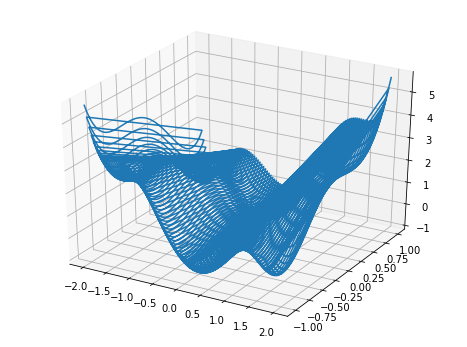

In [9]:

fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

p = ax.plot_wireframe(X, Y, Z)